In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
# df = pd.read_csv("/Users/claudiostamile/Downloads/fraudTrain.csv")
df = pd.read_csv("./data/fraudTrain.csv")
df = df[df["is_fraud"]==0].sample(frac=0.20, random_state=42).append(df[df["is_fraud"] == 1])
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
811778,811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,...,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0
1101718,1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,...,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0
800013,800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,...,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0
398945,398945,2019-06-30 18:43:08,4716561796955522,fraud_Lynch-Wisozk,home,42.09,Lauren,Anderson,F,11014 Chad Lake Apt. 573,...,48.2777,-112.8456,743,Water engineer,1972-05-04,dbf6c06d3277438afdf7af883fb4285f,1341081788,48.310513,-112.837535,0
207455,207455,2019-04-15 19:57:49,3528407217576457,fraud_Fisher-Schowalter,shopping_net,4.24,Patricia,Leach,F,71309 Martinez Stravenue,...,36.4715,-82.4834,87124,Warden/ranger,1987-02-14,88814660aba0101b174e1e8137f4a7af,1334519869,37.329094,-82.070746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [2]:
# combining trian and test datasets

# df = pd.concat([pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv'),pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')], ignore_index=True)
# df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
# df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Dataset descriptions

In [3]:
import pandas_profiling

df.profile_report()

ModuleNotFoundError: No module named 'pandas_profiling'

In [22]:
df["is_fraud"].value_counts()

0    257834
1      7506
Name: is_fraud, dtype: int64

# Pre-Processing

## Data Cleaning

In [23]:
# Checking Null values
pd.DataFrame(df.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,,0
Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,265340


In [24]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [25]:
from sklearn.utils import resample

df_majority = df2[df2.is_fraud==0]
df_minority = df2[df2.is_fraud==1]

df_maj_dowsampled = resample(df_majority,
                             n_samples=len(df_minority),
                             random_state=42)

df_downsampled = pd.concat([df_minority, df_maj_dowsampled])

print(df_downsampled.is_fraud.value_counts())
# G_down = build_graph_bipartite(df_downsampled)

1    7506
0    7506
Name: is_fraud, dtype: int64


In [27]:
# Seperating nominal from numeric
# Note:There are almost 2M records in dfz.In order to avoid the heavy calculation,only the first 100000 rows were selected.
# df2 = df.loc[:99999,df.dtypes!=np.object]
df2 = df_downsampled.loc[:,df_downsampled.dtypes!=np.object]
df2

/home/studio-lab-user/.conda/envs/my37g/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
2449,2449,4613314721966,281.06,0,28611,35.9946,-81.7266,885,1325466397,36.430124,-81.179483,1
2472,2472,340187018810220,11.52,1,78208,29.4400,-98.4590,1595797,1325468849,29.819364,-99.142791,1
2523,2523,340187018810220,276.31,1,78208,29.4400,-98.4590,1595797,1325473523,29.273085,-98.836360,1
2546,2546,4613314721966,7.03,0,28611,35.9946,-81.7266,885,1325475483,35.909292,-82.091010,1
2553,2553,340187018810220,275.73,1,78208,29.4400,-98.4590,1595797,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...
152220,152220,4736845434667908128,9.96,1,12910,44.8816,-73.6408,2148,1332485079,44.317942,-73.350045,0
72368,72368,4935858973307492,135.23,0,31042,32.8088,-83.1740,1841,1329025351,33.730859,-83.828071,0
1123852,1123852,4836998673805450,185.23,1,49854,46.0062,-86.2555,6469,1365825967,46.353816,-85.667425,0
724301,724301,4585132874641,86.16,1,64686,39.7417,-93.6289,271,1352076372,39.385452,-93.366583,0


## Train Test Split

In [28]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Resampling via SMOTE

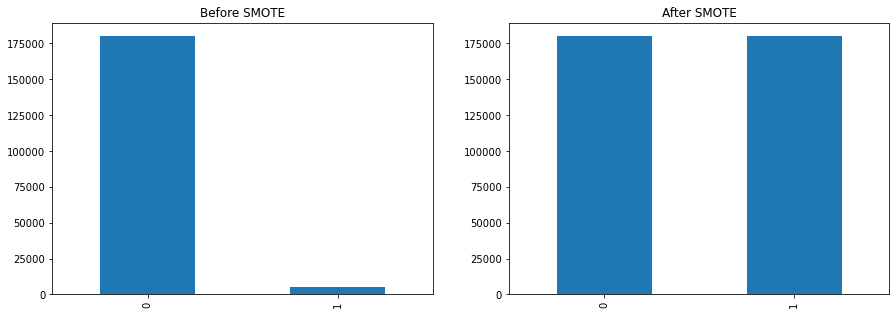

In [16]:
# sm = SMOTE()
# X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# # to demonstrate the effect of SMOTE over imbalanced datasets
# fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
# ax1.set_title('Before SMOTE')
# pd.Series(y_train).value_counts().plot.bar(ax=ax1)

# ax2.set_title('After SMOTE')  
# pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

# plt.show()

In [17]:
# X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

The dataset is heavily imbalanced. Through resampling, fraud transactions (Class = 1) are randomly increased to the same amount as non-fraud transactions (Class = 0) in order to avoid the bias results toward the non-fraudulent class.

## Scaling

### Robust Scaler VS MinMaxScaler VS Standard Scaler

ValueError: cannot reindex from a duplicate axis

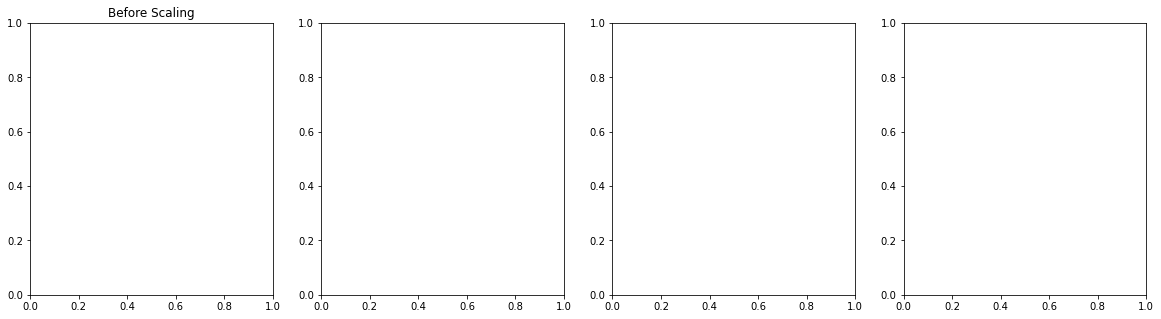

In [30]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_df = scaler.fit_transform(df2)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(df2)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df2)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[9], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

plt.show()

Since we have a huge amount of data, its better to normalize the dataset by using RobustScaler which scales the data according to the quantile range.


In [11]:
# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# KNN

In [12]:
param_grid = {'n_neighbors': range(1,20)}
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [13]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................................n_neighbors=2; total time=   1.7s
[CV 2/5] END ..................................n_neighbors=2; total time=   1.8s
[CV 3/5] END ..................................n_neighbors=2; total time=   1.7s
[CV 4/5] END ..................................n_neighbors=2; total time=   1.8s
[CV 5/5] END ..................................n_neighbors=2; total time=   1.7s
[CV 1/5] END ..................................n_neighbors=8; total time=   2.2s
[CV 2/5] END ..................................n_neighbors=8; total time=   2.1s
[CV 3/5] END ..................................n_neighbors=8; total time=   2.1s
[CV 4/5] END ..................................n_neighbors=8; total time=   2.1s
[CV 5/5] END ..................................n_neighbors=8; total time=   2.2s
[CV 1/5] END .................................n_neighbors=17; total time=   2.7s
[CV 2/5] END .................................n_

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [14]:
knn.best_params_ # best parameter

{'n_neighbors': 2}

In [15]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[29378   320]
 [   31   271]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.46      0.90      0.61       302

    accuracy                           0.99     30000
   macro avg       0.73      0.94      0.80     30000
weighted avg       0.99      0.99      0.99     30000



# Gaussian Naive Bayes

In [31]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

[[2190   82]
 [ 978 1254]]


              precision    recall  f1-score   support

           0       0.69      0.96      0.81      2272
           1       0.94      0.56      0.70      2232

    accuracy                           0.76      4504
   macro avg       0.81      0.76      0.75      4504
weighted avg       0.81      0.76      0.75      4504



# Decision Tree

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[1955  317]
 [ 311 1921]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2272
           1       0.86      0.86      0.86      2232

    accuracy                           0.86      4504
   macro avg       0.86      0.86      0.86      4504
weighted avg       0.86      0.86      0.86      4504



# Random Forest

In [33]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2109  163]
 [ 230 2002]]


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2272
           1       0.92      0.90      0.91      2232

    accuracy                           0.91      4504
   macro avg       0.91      0.91      0.91      4504
weighted avg       0.91      0.91      0.91      4504



# AdaBoost

In [34]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[2057  215]
 [ 279 1953]]


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2272
           1       0.90      0.88      0.89      2232

    accuracy                           0.89      4504
   macro avg       0.89      0.89      0.89      4504
weighted avg       0.89      0.89      0.89      4504



# Bagging

In [35]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[2046  226]
 [ 241 1991]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2272
           1       0.90      0.89      0.90      2232

    accuracy                           0.90      4504
   macro avg       0.90      0.90      0.90      4504
weighted avg       0.90      0.90      0.90      4504



# Classification Evaluation via AUROC

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               AdaBoostClassifier(random_state=42),
               BaggingClassifier(random_state=42)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

NameError: name 'knn' is not defined

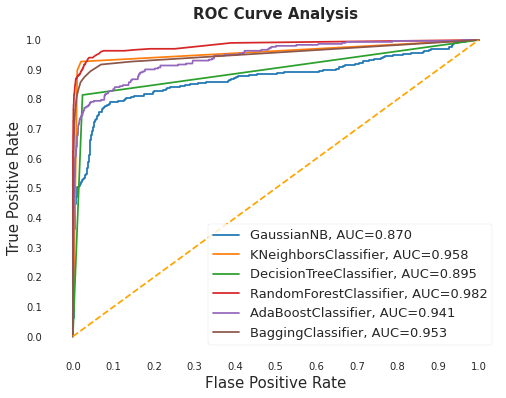

In [22]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()